# 学習

In [1]:
from torch.utils.data import DataLoader
import torch
import torch.nn as nn
import torch.nn.functional as func
import torch.optim as optim

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score

import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("source/14_data.csv")
df.head()

,月間有効求人倍率（一般）,総人口に占める男性の割合,15歳未満人口割合,15～64歳人口割合,65歳以上人口割合,合計特殊出生率,転入者数（日本人移動者）,転出者数（日本人移動者）,結婚件数,離婚件数,...,交通・通信費（二人以上の世帯）,教育費（二人以上の世帯）,教養娯楽費（二人以上の世帯）,その他の消費支出（二人以上の世帯）,米FRB金利,日銀金利,NYダウ平均株価,日経平均株価,ドル円為替レート,県内総生産（名目）
0,1.223090,0.470857,0.107619,0.573714,0.318667,1.24,0.01,0.01,0.004460,0.001873,...,42277,8848,29335,57289,2.35,-0.071,28538.44,23656.62,108.23,3.720403
1,1.184696,0.470866,0.109156,0.577374,0.313280,1.27,0.01,0.01,0.004335,0.001886,...,39308,10825,26991,56984,1.95,-0.070,23327.46,20014.77,111.41,3.717905
2,1.109067,0.471053,0.110526,0.582519,0.306767,1.29,0.01,0.01,0.004504,0.001907,...,39559,9837,26797,57003,1.25,-0.054,24719.22,22764.94,112.50,3.659565
3,1.015139,0.471039,0.112108,0.588565,0.299327,1.29,0.01,0.01,0.004603,0.001957,...,43681,10751,29305,59564,0.50,-0.043,19762.60,19114.37,103.97,3.575187
4,0.919256,0.471426,0.113030,0.592895,0.289570,1.31,0.01,0.01,0.004732,0.002083,...,35895,9302,26930,52197,0.25,0.074,17425.03,19033.71,123.31,3.554339


In [3]:
df.describe()

,月間有効求人倍率（一般）,総人口に占める男性の割合,15歳未満人口割合,15～64歳人口割合,65歳以上人口割合,合計特殊出生率,転入者数（日本人移動者）,転出者数（日本人移動者）,結婚件数,離婚件数,...,交通・通信費（二人以上の世帯）,教育費（二人以上の世帯）,教養娯楽費（二人以上の世帯）,その他の消費支出（二人以上の世帯）,米FRB金利,日銀金利,NYダウ平均株価,日経平均株価,ドル円為替レート,県内総生産（名目）
count,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,...,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000,705.000000
mean,0.920549,0.482182,0.130597,0.606896,0.260622,1.450142,0.016241,0.018468,0.004844,0.001785,...,39664.075177,11601.173050,29087.485106,66555.139007,1.570000,0.099067,16048.106667,15697.132000,103.814667,3.783481
std,0.405479,0.010011,0.011315,0.032129,0.039071,0.141613,0.005531,0.004085,0.000618,0.000246,...,6767.478240,3593.464309,4696.445546,11133.007293,1.719533,0.171453,5661.530807,4796.352819,13.281067,0.795935
min,0.212563,0.466389,0.098344,0.530021,0.160765,1.000000,0.010000,0.010000,0.003111,0.001253,...,23416.000000,3697.000000,16602.000000,35658.000000,0.250000,-0.071000,8776.390000,8455.350000,78.960000,2.483798
25%,0.584229,0.472446,0.123701,0.583883,0.234315,1.350000,0.010000,0.020000,0.004425,0.001626,...,34825.000000,9167.000000,25888.000000,59096.000000,0.250000,-0.043000,11577.510000,10395.180000,94.490000,3.306770
50%,0.855910,0.481854,0.130643,0.606509,0.260255,1.450000,0.020000,0.020000,0.004774,0.001763,...,39184.000000,11202.000000,28654.000000,65493.000000,0.500000,0.073000,13264.820000,16291.310000,106.760000,3.679103
75%,1.201533,0.489672,0.136582,0.627959,0.289494,1.540000,0.020000,0.020000,0.005173,0.001935,...,44026.000000,13472.000000,31660.000000,72021.000000,2.350000,0.102000,19762.600000,19114.370000,112.500000,4.095446
max,2.000029,0.505546,0.186695,0.693519,0.371636,1.960000,0.030000,0.030000,0.007038,0.002693,...,61649.000000,29916.000000,47739.000000,136862.000000,5.250000,0.503000,28538.440000,23656.620000,123.310000,8.257079


In [4]:
t = df['月間有効求人倍率（一般）']
x = df.drop('月間有効求人倍率（一般）', axis=1)

In [5]:
# シードを固定して再現性を確保
torch.manual_seed(0)

batch_size = 3
lr = 1e-2
dropout = 0
weight_decay = 0.07
epoch = 100
hidden_size = 35
hidden_layer = 15

In [6]:
# train : val : test = 0.6 : 0.2 : 0.2
x_train, x_test, t_train, t_test = train_test_split(x, t, test_size=0.4,random_state=0)
x_val, x_test, t_val, t_test = train_test_split(x_test, t_test, test_size=0.5,random_state=0)

In [7]:
print(len(x_train), len(x_val), len(x_test))

423 141 141


In [8]:
#標準化
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

In [9]:
# PyTorch で学習に使用できる形式へ変換
x_train = torch.tensor(x_train, dtype=torch.float32)
t_train = torch.tensor(t_train.values, dtype=torch.float32).unsqueeze(1)

x_val = torch.tensor(x_val, dtype=torch.float32)
t_val = torch.tensor(t_val.values, dtype=torch.float32).unsqueeze(1)

x_test = torch.tensor(x_test, dtype=torch.float32)
t_test = torch.tensor(t_test.values, dtype=torch.float32).unsqueeze(1)

In [10]:
# 入力変数と目的変数をまとめる
train = torch.utils.data.TensorDataset(x_train, t_train)
val = torch.utils.data.TensorDataset(x_val, t_val)
test = torch.utils.data.TensorDataset(x_test, t_test)

In [11]:
train_dataloader = DataLoader(train, batch_size=batch_size, shuffle=True)
val_dataloader = DataLoader(val, batch_size=batch_size, shuffle=True)
test_dataloader = DataLoader(test, batch_size=batch_size, shuffle=False)

In [12]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(53, hidden_size)
        self.fcn = nn.Linear(hidden_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, 1)
        self.drop = nn.Dropout(dropout)
        self.norm = nn.BatchNorm1d(hidden_size)
        
    def forward(self, x):
        x = self.fc1(x)
        x = func.relu(x)
        
        for i in range(1, hidden_layer):
            x = self.fcn(x)
            x = func.relu(x)
            x = self.drop(x)
        
        x = self.fc2(x)
        return x

In [13]:
model = Net()
criterion = nn.MSELoss() #恒等関数つき
optimizer = optim.Adagrad(model.parameters(), lr=lr, weight_decay=weight_decay)

In [14]:
loss_train_all = []
loss_val_all = []

for epoch in range(0, epoch+1):
    loss_train = 0
    loss_val = 0
    
    model.train()
    for x,t in train_dataloader:
        y = model(x)
        loss = criterion(y,t)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        loss_train += loss.item()
        
    loss_train_mean = loss_train / len(train_dataloader)
    
    y_val_all = []
    t_val_all = []
    
    model.eval()
    with torch.no_grad():
        for (x,t) in val_dataloader:
            y = model(x)
            
            y_val_all.extend(y.squeeze().cpu().detach().numpy().copy())
            t_val_all.extend(t.squeeze().cpu().detach().numpy().copy())
            
            loss = criterion(y,t)
            loss_val += loss.item()
            
    loss_val_mean = loss_val / len(val_dataloader)
    
    if epoch % 5 == 0:
        loss_train_all.append(loss_train_mean)
        loss_val_all.append(loss_val_mean)
        print(f"epoch: {epoch} | loss_train: {loss_train_mean}, loss_val: {loss_val_mean}")

r2score = r2_score(y_val_all,t_val_all)
print(f" R2_val = {r2score}")

epoch: 0 | loss_train: 0.2075267507503113, loss_val: 0.1672987185661344
epoch: 5 | loss_train: 0.16430225223777584, loss_val: 0.1647036201370127
epoch: 10 | loss_train: 0.1534804912393001, loss_val: 0.1496465329397866
epoch: 15 | loss_train: 0.031120786148599013, loss_val: 0.028931952141066815
epoch: 20 | loss_train: 0.02027785138793435, loss_val: 0.024833609392133322
epoch: 25 | loss_train: 0.016942347651194775, loss_val: 0.025781914777558375
epoch: 30 | loss_train: 0.014689104691505306, loss_val: 0.017984288013317286
epoch: 35 | loss_train: 0.01332977989520085, loss_val: 0.01712612860880673
epoch: 40 | loss_train: 0.011315305210629945, loss_val: 0.013744309583420003
epoch: 45 | loss_train: 0.010872536859638553, loss_val: 0.015791093361529302
epoch: 50 | loss_train: 0.010280709590393173, loss_val: 0.016030846990922346
epoch: 55 | loss_train: 0.009817383387386105, loss_val: 0.016803894570949388
epoch: 60 | loss_train: 0.0088210777428698, loss_val: 0.013752246730059306
epoch: 65 | loss_

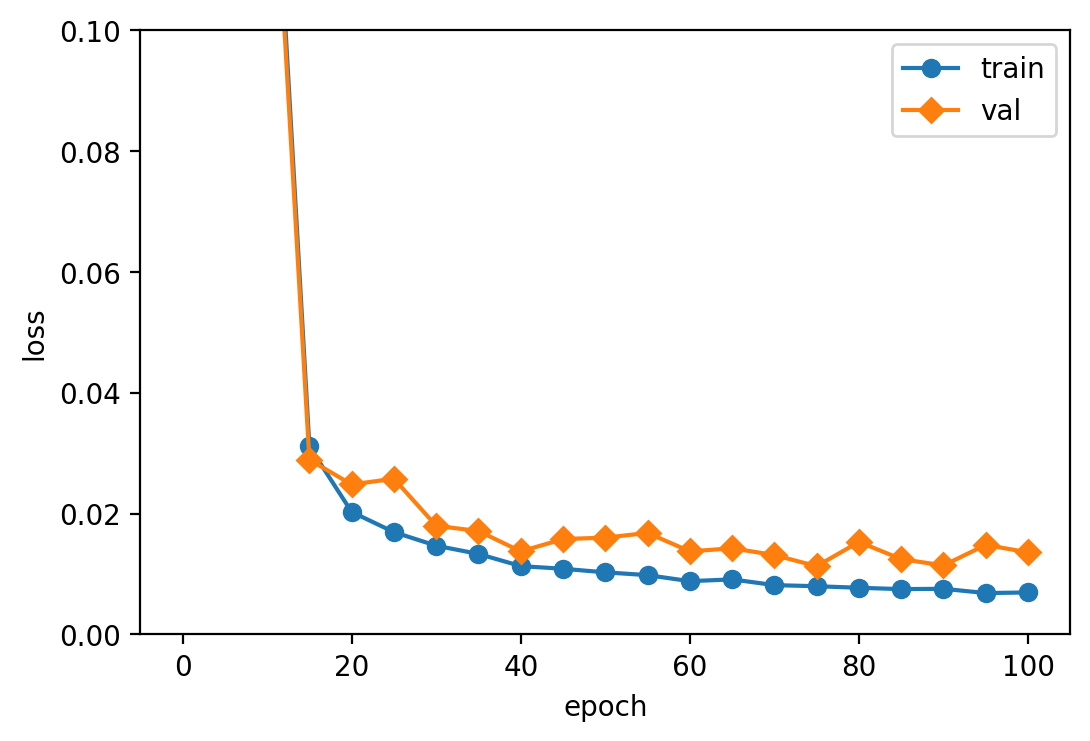

In [15]:
from matplotlib import pyplot as plt
plt.figure(dpi=200)
x = list(range(0, epoch+1, 5))

plt.plot(x, loss_train_all, label="train", marker="o")
plt.plot(x, loss_val_all, label="val", marker="D")
plt.ylabel("loss")
plt.xlabel("epoch")
plt.ylim(0, 0.1)
plt.legend()
plt.show()

# SHAPモデル

In [16]:
x_base = torch.cat((x_train, x_val, x_test),0)

In [17]:
import japanize_matplotlib
import shap
explainer = shap.DeepExplainer(model, data=x_base)
shap_values = explainer.shap_values(x_base)

Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.


In [18]:
columns = df.columns[1:]

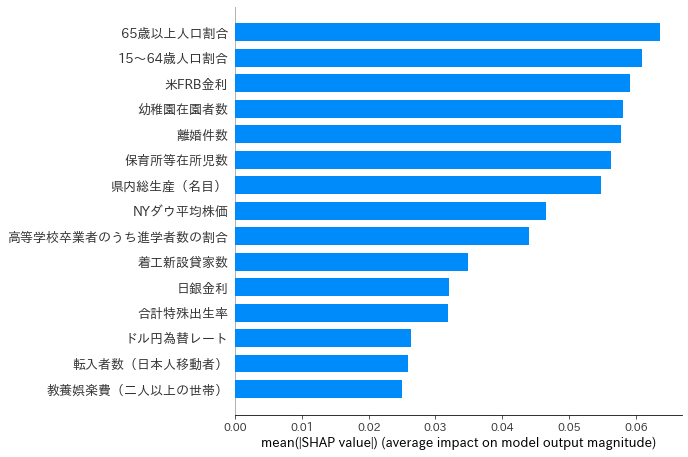

In [19]:
shap.summary_plot(shap_values, x_base, feature_names=columns, plot_type="bar",max_display=15)

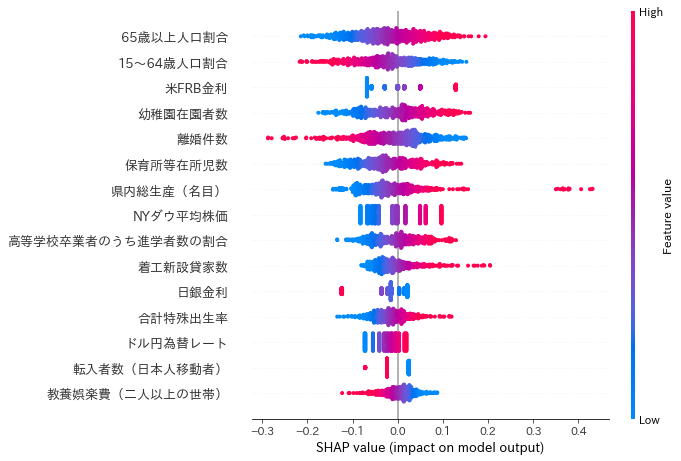

In [20]:
shap.summary_plot(shap_values, x_base, feature_names=columns, max_display=15)

In [21]:
shap.initjs()
shap.force_plot(
    base_value=explainer.expected_value,
    shap_values=shap_values,
    features=x_base.cpu().detach().numpy().copy(),
    feature_names=columns)